In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

%pylab inline

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = pd.read_csv('data/experiment2.csv')

In [3]:
data1

,U_R,nu_R
0,3.6,1342
1,4.8,1398
2,5.2,1410
3,6.0,1438
4,6.8,1460
5,7.6,1480
6,8.4,1497
7,9.0,1515
8,9.4,1529
9,10.0,1570


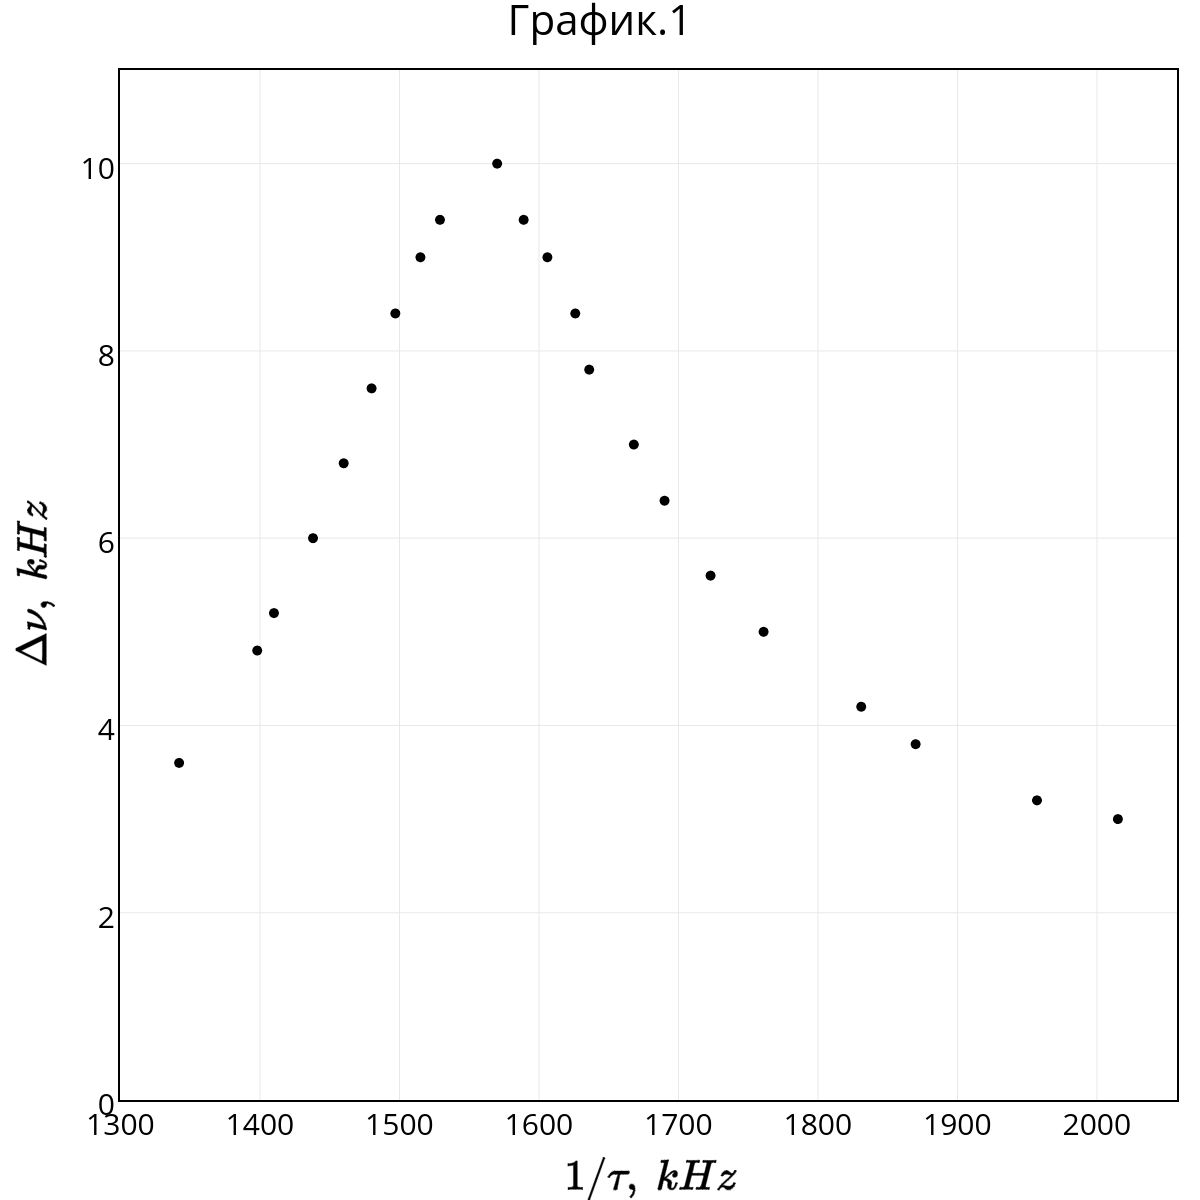

In [4]:
trace1 = go.Scatter(
    y = data1['U_R'],
    x = data1['nu_R'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$1/{τ},~kHz$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Delta{ν},~kHz$',
        range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=400)

In [5]:
from scipy.interpolate import interp1d

In [6]:
f = interp1d(data1['nu_R'], data1['U_R'], kind = 'cubic', bounds_error=False)
vecf = np.vectorize(f)

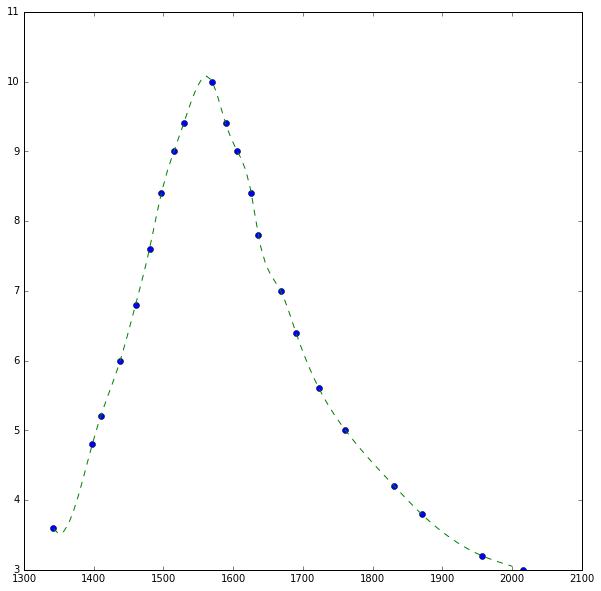

In [7]:
plt.figure(1, figsize=(10,10))
xnew = np.linspace(1300, 2000, 100)
plt.plot(data1['nu_R'], data1['U_R'], 'o', xnew, f(xnew), '--')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

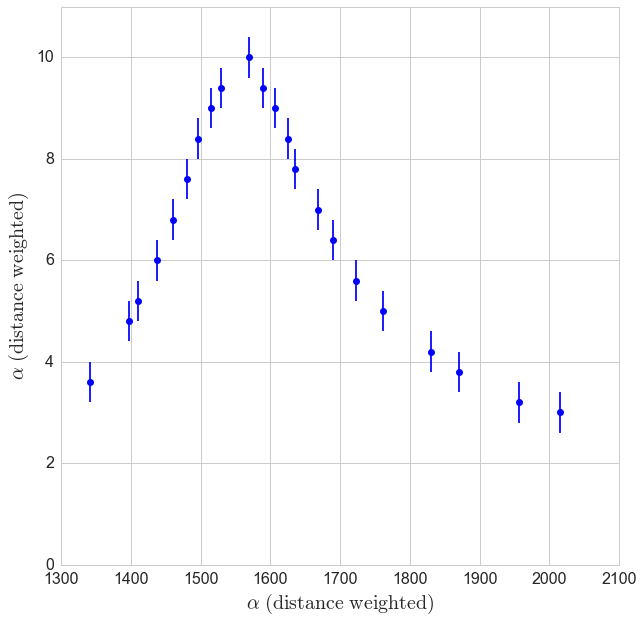

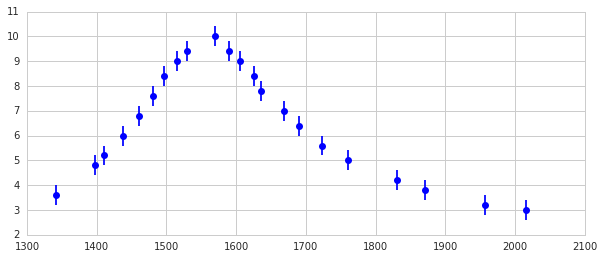

In [47]:
fig1 = plt.figure(1, figsize=(10,10))
ax1 = fig1.add_subplot(111)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.ylim(0,11)

plt.ylabel(r'$\mathrm{\alpha \ (distance \ weighted)}$', {'fontsize': 20})
plt.xlabel(r'$\mathrm{\alpha \ (distance \ weighted)}$', {'fontsize': 20})

ax1.errorbar(data1['nu_R'], data1['U_R'], yerr=0.4, fmt='bo')

fig2 = plt.figure(2, figsize=(10, 4))
ax2 = fig2.add_subplot(111)
ax2.errorbar(data1['nu_R'], data1['U_R'], yerr=0.4, fmt='bo')



fig.savefig('yourfilename.png', dpi = 300)

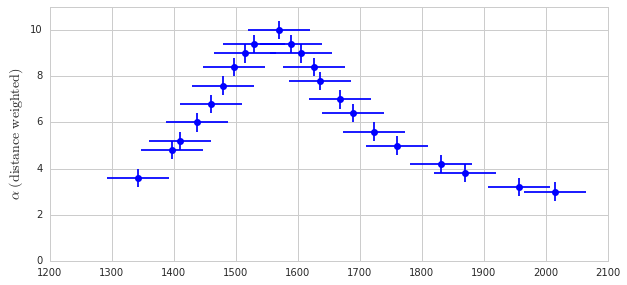

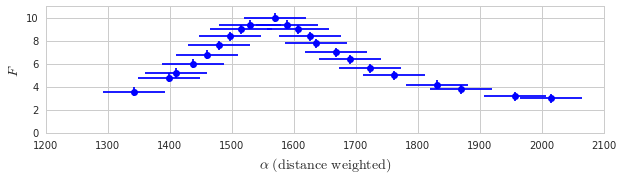

In [100]:
fig1 = plt.figure(1, figsize=(10,10))
ax1 = plt.subplot(211)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.ylim(0,11)
plt.ylabel(r'$\mathrm{\alpha \ (distance \ weighted)}$', {'fontsize': 14})
ax1.errorbar(data1['nu_R'], data1['U_R'], yerr=0.4, xerr=50, fmt='bo')

fig1.savefig('yourfilename.png', dpi = 300)

fig2 = plt.figure(2, figsize=(10,5))
ax2 = plt.subplot(212)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.ylim(0,11)
plt.ylabel(r'$F$', {'fontsize': 14})
plt.xlabel(r'$\mathrm{\alpha \ (distance \ weighted)}$', {'fontsize': 14})
ax2.errorbar(data1['nu_R'], data1['U_R'], yerr=0.4, xerr=50, fmt='bo')

fig2.savefig('yourfilename2.png', dpi = 300)

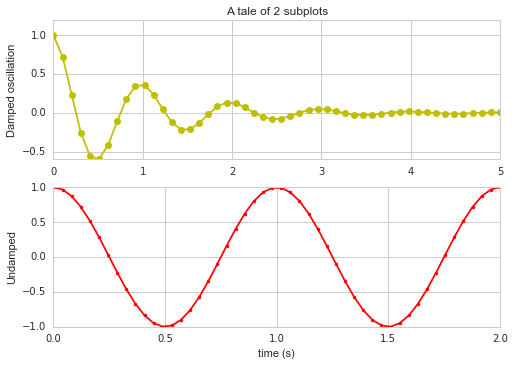

In [97]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()